# Юдин Артём Вариант 1
Классификация изображений с прямоугольником или кругом

In [1]:
import numpy as np
from keras.layers import Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


In [ ]:
def gen_rect(size=50):
    img = np.zeros([size, size])
    x = np.random.randint(0, size)
    y = np.random.randint(0, size)
    w = np.random.randint(size // 10, size // 2)
    h = np.random.randint(size // 10, size // 2)
    img[x:x + w, y:y + h] = 1
    return img


def gen_circle(size=50):
    img = np.zeros([size, size])
    x = np.random.randint(0, size)
    y = np.random.randint(0, size)
    r = np.random.randint(size // 10, size // 3)
    for i in range(0, size):
        for j in range(0, size):
            if (i-x)**2 + (j-y)**2 <= r**2:
                img[i, j] = 1
    return img


def gen_data(size=500, img_size=50):
    c1 = size // 2
    c2 = size - c1

    label_c1 = np.full([c1, 1], 'Square')
    data_c1 = np.array([gen_rect(img_size) for i in range(c1)])
    label_c2 = np.full([c2, 1], 'Circle')
    data_c2 = np.array([gen_circle(img_size) for i in range(c2)])

    data = np.vstack((data_c1, data_c2))
    label = np.vstack((label_c1, label_c2))

    return data, label

In [3]:
X, y = gen_data()

In [4]:
n_class = np.unique(y).shape[0]
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
X = np.expand_dims(X, axis=3)

In [5]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Convolution2D(64, 3, 3, padding='same', activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(n_class, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, seed=42)

In [7]:
h = model.fit(X_train, y_train, batch_size=10, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4599 - loss: 0.7005 - val_accuracy: 0.6600 - val_loss: 0.6642
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6065 - loss: 0.6713 - val_accuracy: 0.6400 - val_loss: 0.6315
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7014 - loss: 0.6333 - val_accuracy: 0.7000 - val_loss: 0.6280
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6619 - loss: 0.6181 - val_accuracy: 0.6600 - val_loss: 0.6295
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6805 - loss: 0.5917 - val_accuracy: 0.6400 - val_loss: 0.6604
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6630 - loss: 0.5882 - val_accuracy: 0.6300 - val_loss: 0.6755
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7304 - loss: 0.5335 - val_accuracy: 0.6600 - val_loss: 0.6107
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7501 - loss: 0.5062 - val_accuracy: 0.6600 - v

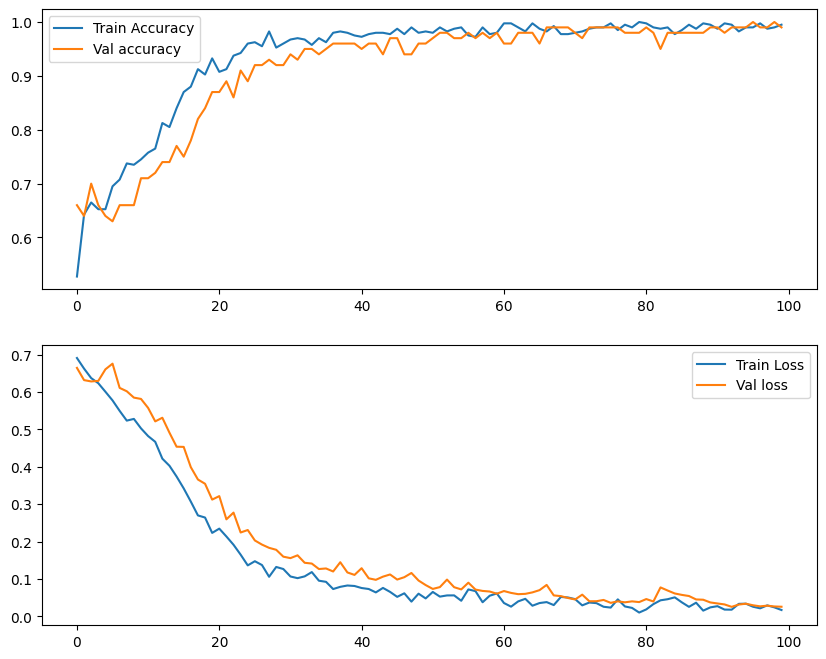

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(h.history['accuracy'], label='Train Accuracy')
ax[0].plot(h.history['val_accuracy'], label='Val accuracy')
ax[0].legend()

ax[1].plot(h.history['loss'], label='Train Loss')
ax[1].plot(h.history['val_loss'], label='Val loss')
ax[1].legend()
plt.show()